In [1]:
import pandas as pd
import datetime as date
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load data
compdata = pd.read_csv("./data/sp500_companies.csv")
indexdata = pd.read_csv("./data/sp500_index.csv")
stockdata = pd.read_csv("./data/sp500_stocks.csv")
stockdata["Date"] = pd.to_datetime(stockdata.Date)

In [ ]:
compdata

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,222.01,3355858698240,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.062950
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,136.05,3337306505216,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.062602
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,408.46,3036850946048,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.056966
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,170.68,2080281853952,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.039022
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,169.24,2079096569856,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.039000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,NMS,PARA,Paramount Global,Paramount Global,Communication Services,Entertainment,10.87,7682372608,2.979000e+09,-0.105,New York,NY,United States,21900.0,"Paramount Global operates as a media, streamin...",0.000144
499,NYQ,HII,"Huntington Ingalls Industries,","Huntington Ingalls Industries, Inc.",Industrials,Aerospace & Defense,191.04,7475261440,1.071000e+09,-0.024,Newport News,VA,United States,44000.0,"Huntington Ingalls Industries, Inc. designs, b...",0.000140
500,NYQ,BWA,BorgWarner Inc.,BorgWarner Inc.,Consumer Cyclical,Auto Parts,33.45,7315515392,1.882000e+09,-0.048,Auburn Hills,MI,United States,39900.0,"BorgWarner Inc., together with its subsidiarie...",0.000137
501,NYQ,AMTM,"Amentum Holdings, Inc.","Amentum Holdings, Inc.",Industrials,Specialty Business Services,29.63,7209037824,4.330000e+08,-0.031,Chantilly,VA,United States,NaN,"Amentum Holdings, Inc. provides engineering an...",0.000135


In [22]:
def choose_stock_time(choose_all = False, symbol="AAPL", year=0, month=0):
    year_start = stockdata["Date"].iloc[-1].year - year
    month_start = stockdata["Date"].iloc[-1].month - month
    day_start = stockdata["Date"].iloc[-1].day
    start_date = date.datetime(year_start, month_start, day_start)
    if choose_all == True:
        return stockdata.loc[(stockdata.Date>=start_date)]
    else:
        return stockdata.loc[(stockdata.Symbol==symbol) & (stockdata.Date>=start_date)]

def plot_ema(symbol="AAPL", year=0, month=0, position = "Adj Close", ema = True):
    data = choose_stock_time(symbol=symbol,year=year,month=month)
    plt.figure(figsize=(12,6))
    plt.plot(data["Date"], data[position], label=position)
    if ema == True:
        data["ema-50"] = data[position].ewm(span=50, adjust=False).mean()
        data["ema-200"] = data[position].ewm(span=200, adjust=False).mean()
        plt.plot(data["Date"], data["ema-50"], label="EMA-50")
        plt.plot(data["Date"], data["ema-200"], label="EMA-200")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Price (USD)")
    plt.show()

/var/folders/sh/g6n8_01x0qqbb4xxwmrw8jj80000gn/T/ipykernel_4463/3595141201.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ema-50"] = data[position].ewm(span=50, adjust=False).mean()
/var/folders/sh/g6n8_01x0qqbb4xxwmrw8jj80000gn/T/ipykernel_4463/3595141201.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ema-200"] = data[position].ewm(span=200, adjust=False).mean()


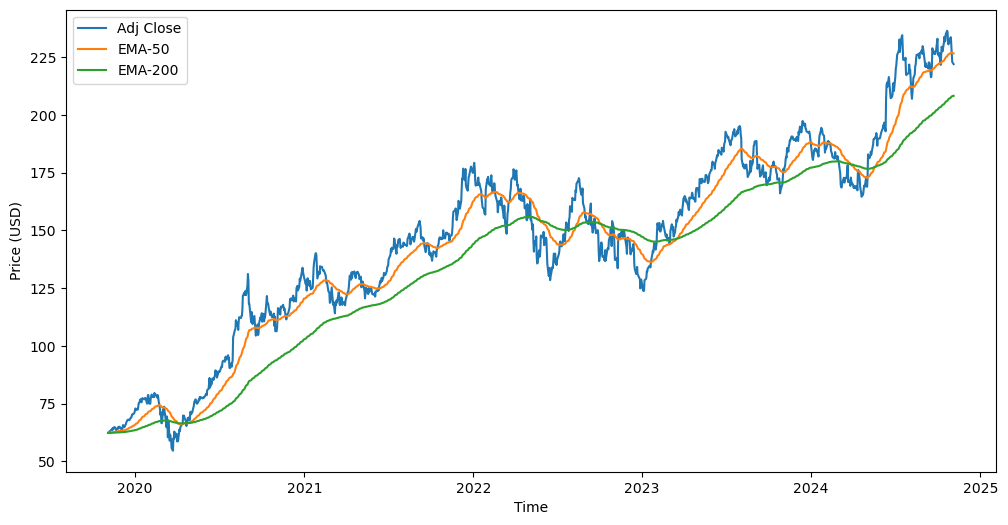

In [ ]:
plot_ema(symbol="AAPL", year=5, month=0)

In [28]:
from matplotlib import cm

In [147]:
# plot all market   
def plot_all_ema(ema=50, year=1, month=1):
    data = choose_stock_time(choose_all=True,year=year,month=month)
    if ema>0:
        data["ema"] = data["Adj Close"].ewm(span=ema, adjust=False).mean() 
        data_matrix = data[["Date", "Symbol", "ema"]]
    else:
        data_matrix = data[["Date", "Symbol", "Adj Close"]]
    data_matrix = data_matrix.pivot(index="Date", columns="Symbol").to_numpy()
    
    def normalize(data):
        normalized = data
        for i in range(len(data[0,:])):
            normalized[:,i] = data[:,i] - data.mean(axis=1)
            normalized[:,i] = normalized[:,i]/data.std(axis=1)
        return normalized
    
    data_matrix = normalize(data_matrix)

    # # plot data
    colors = cm.viridis(np.linspace(0., 0.95, len(data_matrix[0,:]))) 
    plt.figure(figsize=(12,6))
    for i in range(len(data_matrix[0,:])):
        plt.plot(data_matrix[:,i], color=colors[i])
    
    plt.show()

/var/folders/sh/g6n8_01x0qqbb4xxwmrw8jj80000gn/T/ipykernel_4463/2633755624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ema"] = data["Adj Close"].ewm(span=ema, adjust=False).mean()


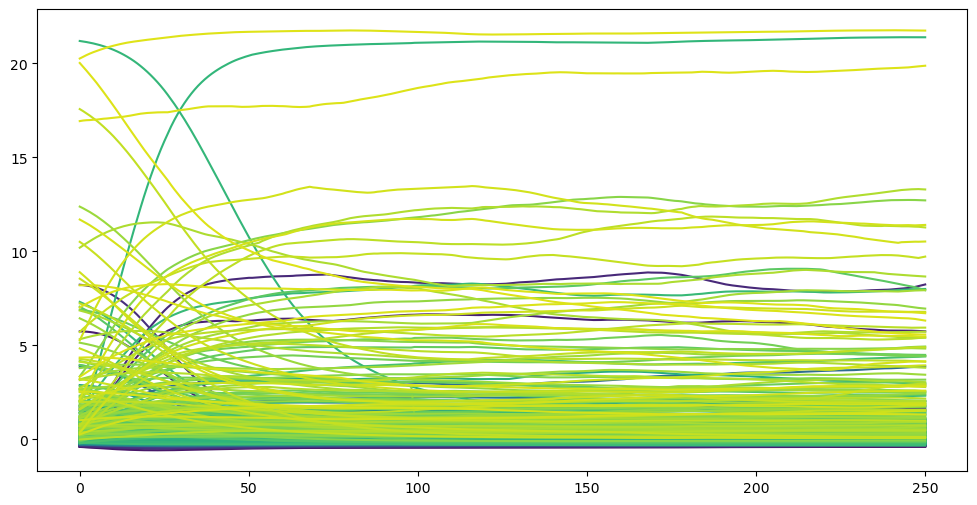

/var/folders/sh/g6n8_01x0qqbb4xxwmrw8jj80000gn/T/ipykernel_4463/2633755624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ema"] = data["Adj Close"].ewm(span=ema, adjust=False).mean()


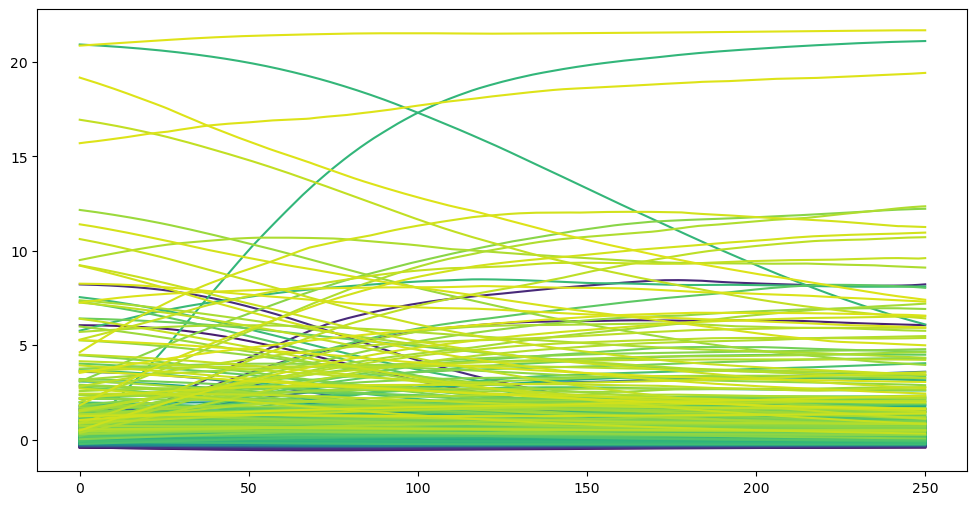

In [155]:
plot_all_ema(ema=50,year=1,month=0)
plot_all_ema(ema=200,year=1,month=0)

In [92]:
len(stockdata.columns)

8